In [28]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder

In [29]:
# load dataset
dataframe = pd.read_csv(r"homeLoanAproval_modificado.csv",sep=',')

In [30]:
dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,PropertyArea,LoanStatus
0,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267.0,360.0,Urban,Y


In [31]:
# assuming that 'gender' is the name of the column causing the issue
le = LabelEncoder()
dataframe['Education'] = le.fit_transform(dataframe['Education'])
dataframe['Gender'] = le.fit_transform(dataframe['Gender'])
dataframe['Married'] = le.fit_transform(dataframe['Married'])
dataframe['SelfEmployed'] = le.fit_transform(dataframe['SelfEmployed'])
dataframe['PropertyArea'] = le.fit_transform(dataframe['PropertyArea'])

# now you can split your data and fit the model
X = dataframe[['Education', 'ApplicantIncome', 'CoapplicantIncome', 'Dependents', 'LoanAmount','LoanAmountTerm', 'Gender', 'Married', 'SelfEmployed', 'PropertyArea']].values
y = dataframe['LoanStatus'].values

In [32]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [33]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [34]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


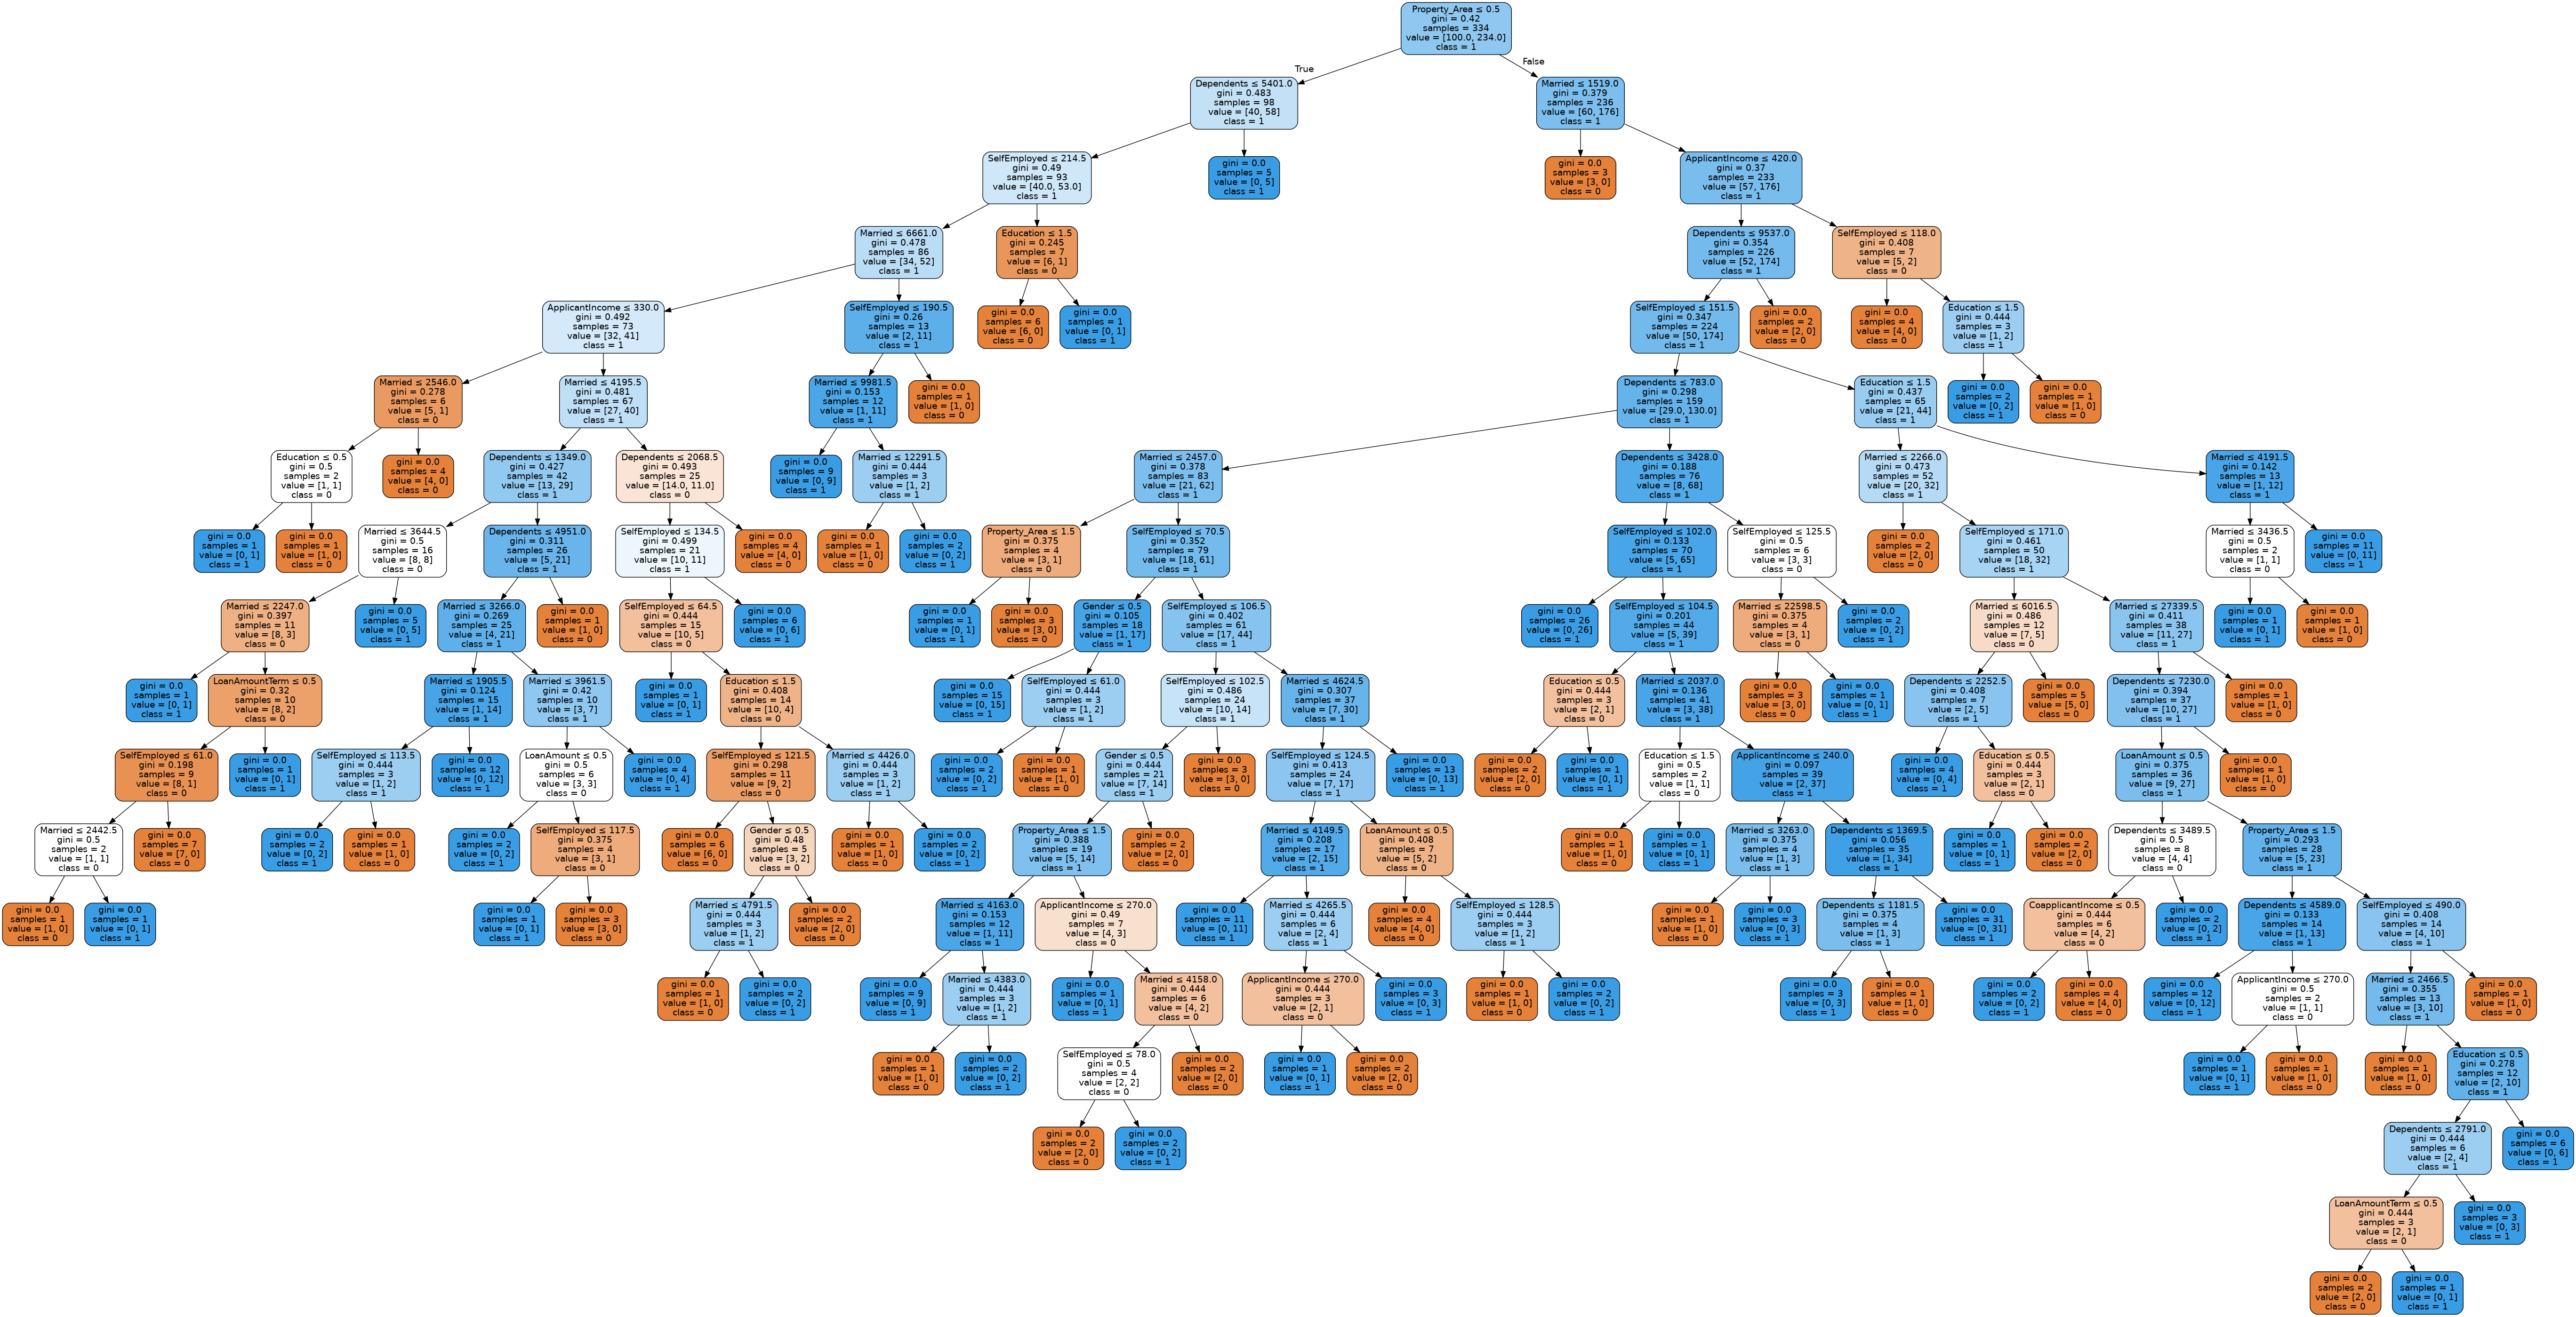

In [37]:
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image  
import pydotplus

feature_cols = ['Gender', 'Married', 'Dependents', 'Education','SelfEmployed','ApplicantIncome','CoapplicantIncome','LoanAmount','LoanAmountTerm','Property_Area']

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())